### **In this notebook we're going to learn how to write neural networks for classification problems**

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

In [49]:
# Import TensorFlow
import tensorflow as tf

### **Create data to view and fit**

In [50]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples = n_samples,
                    noise=0.03,
                    random_state=42)

In [51]:
# Check out the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [52]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand right now...let's visualize it!

In [53]:
import pandas as pd
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label': y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


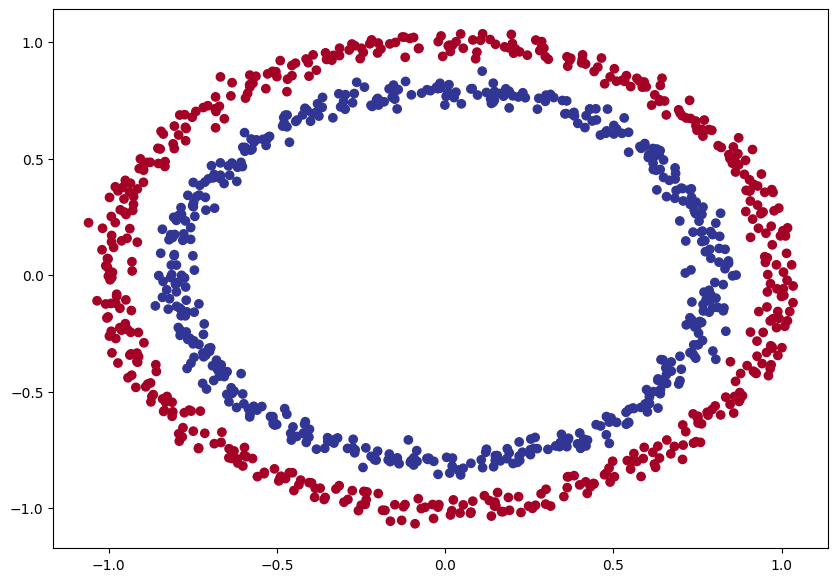

In [54]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

### **Input and output shapes**

In [55]:
# Check the shapes of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [56]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [57]:
# View the first example of features and lables
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### **Steps in modeling**

The steps in modelling with TensorFlow are typically:
1. Create a model
2. Compile a model
3. Fit a model
4. Evaluate the model
5. Tweak
6. Evaluate
7. ...

In [58]:
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']) # what percentage of our examples did the model get right?

# 3. Fit a model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 804us/step - loss: 4.8271 - accuracy: 0.4690
Epoch 2/5
32/32 [==============================] - 0s 676us/step - loss: 4.2647 - accuracy: 0.4930
Epoch 3/5
32/32 [==============================] - 0s 676us/step - loss: 0.7047 - accuracy: 0.5030
Epoch 4/5
32/32 [==============================] - 0s 708us/step - loss: 0.6973 - accuracy: 0.5020
Epoch 5/5
32/32 [==============================] - 0s 676us/step - loss: 0.6952 - accuracy: 0.4930


In [59]:
# Let's try and improve our model by training it for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 836us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy...it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [60]:
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile a modle
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit a model
model_2.fit(X, y, epochs=100, verbose=0)

In [61]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 642us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933058500289917, 0.5]

### **Improving our model**

Let's look into our bag of tricks to see how we can improve our model.

1. **Create a model**
    * add more layers
    * increase the number of hidden units
    * change the activation functions
2. **Compile a model**
    * choose a different optimization function (Adam/SGD)
    * change the learning rate
3. **Fit a model**
    * fitting on more date
    * fitting for longer

In [62]:
tf.random.set_seed(42)

# 1. Build a model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100), # add another layer with 100 neurons
    tf.keras.layers.Dense(10), # add 10 dense neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit a model
model_3.fit(X, y, epochs=100, verbose=0)

In [63]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 772us/step - loss: 0.6975 - accuracy: 0.5150


[0.6974908709526062, 0.5149999856948853]

To visualize our model's predictions let's create a function `plot_decision_boundry()`  
This function will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgridof the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [64]:
import numpy as np

def plot_decision_boundry(model, X, y):
    '''
    Plots the decision bounday create by a model predicting on X.
    This function was inspired by two resources:
        1. cs231n
        2. MadeWithMl
    '''
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stach 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print('Doing multiclass classification')
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('Doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundry
    plt.figure(figsize=(10,7))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 547us/step
Doing binary classification


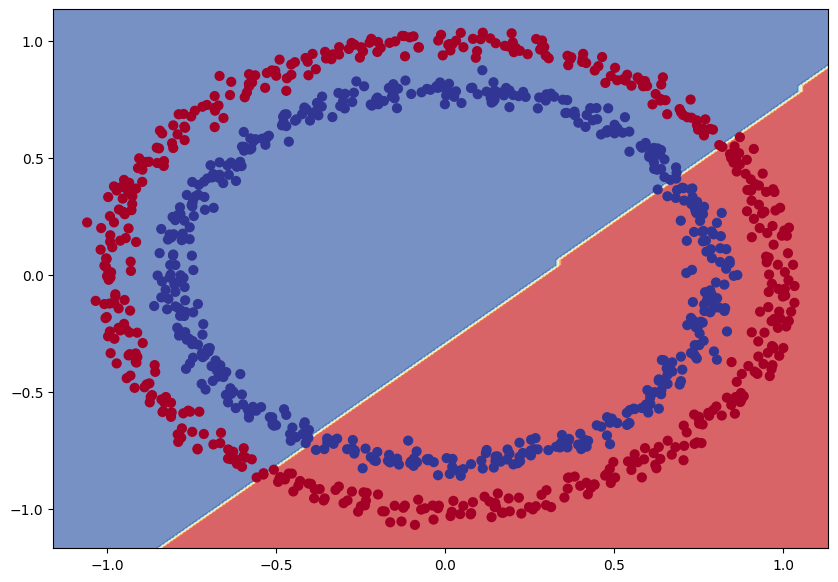

In [65]:
# Check out the predictions our model is making
plot_decision_boundry(model=model_3,
                      X=X,
                      y=y)

In [66]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 10

# Split our regression data into training and test set
X_reg_train = tf.reshape(X_regression[:150], shape=(150,1))
X_reg_test = tf.reshape(X_regression[150:], shape=(50,1))
y_reg_train = tf.reshape(y_regression[:150], shape=(150,1))
y_reg_test = tf.reshape(y_regression[150:], shape=(50,1))

# Fit our model to the regression data
## model_3.fit(X_reg_train, y_reg_train, epochs=100)
# It returns an error, because loss is set to BinaryCrossentropy and data is not adequate to it

In [67]:
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit a model
model_4.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 434.2793 - mae: 434.2793
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 318.3584 - mae: 318.3584
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 206.3645 - mae: 206.3645
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 89.2094 - mae: 89.2094
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 62.4271 - mae: 62.4271
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 89.7290 - mae: 89.7290
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 66.0520 - mae: 66.0520
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 43.6410 - mae: 43.6410
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 48.6687 - mae: 48.6687
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 41.5700 - mae: 41.5700
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 2ms/step


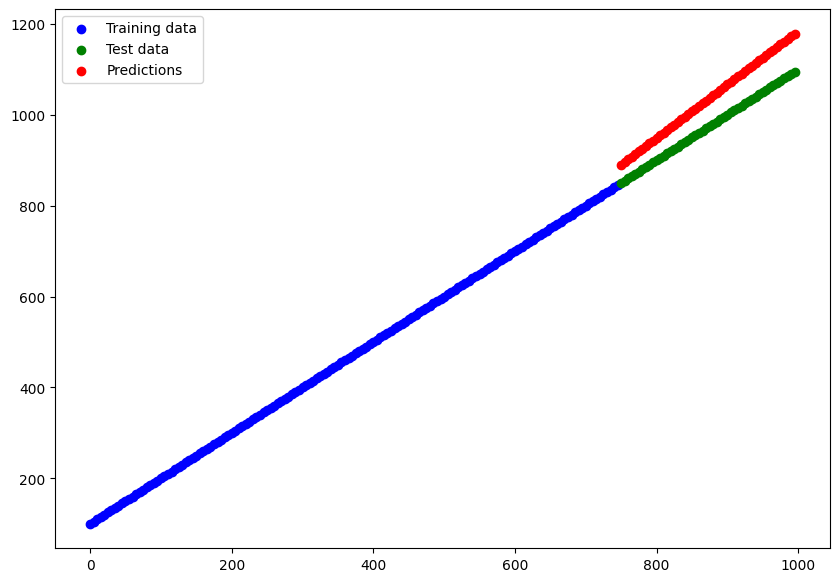

In [68]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend()

### **The missing piece: Non-linearity**

In [69]:
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile a model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit a model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 740us/step - loss: 6.3510 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 676us/step - loss: 6.3476 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 676us/step - loss: 6.3461 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 708us/step - loss: 6.3449 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 676us/step - loss: 6.3440 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 708us/step - loss: 6.3214 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 669us/step - loss: 6.2561 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 708us/step - loss: 6.2085 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 676us/step - loss: 6.1928 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 708us/step - loss: 6.1820 - accura

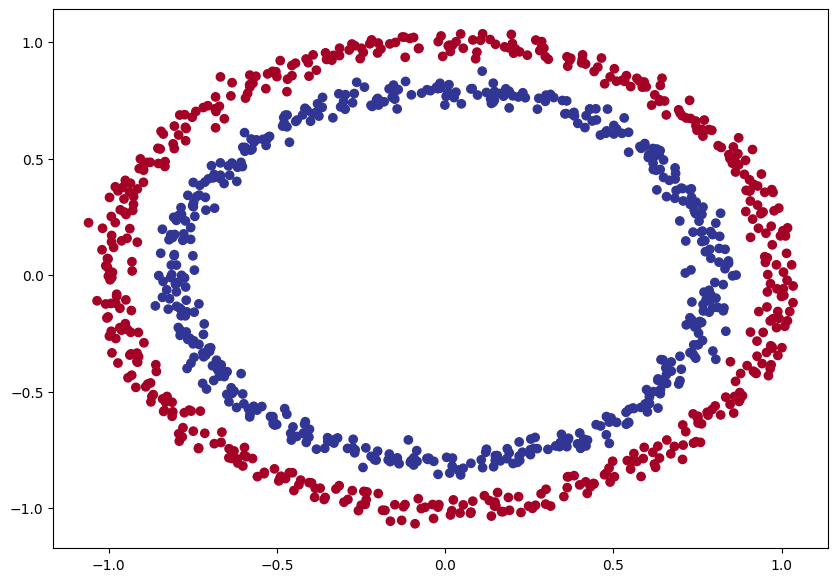

In [70]:
# Check out our data
plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 534us/step
Doing binary classification


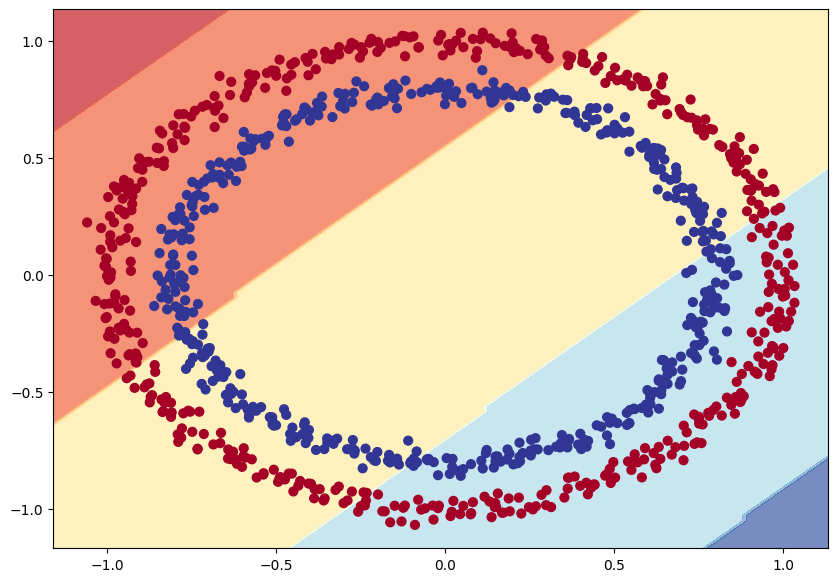

In [71]:
# Check the decision boundary for our mode
plot_decision_boundry(model=model_5,
                      X=X,
                      y=y)

Let's try and build our fist model with non-linear activation function

In [72]:
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile a model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit a model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 740us/step - loss: 4.6759 - accuracy: 0.4730
Epoch 2/100
32/32 [==============================] - 0s 708us/step - loss: 4.5053 - accuracy: 0.4710
Epoch 3/100
32/32 [==============================] - 0s 676us/step - loss: 4.4824 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 708us/step - loss: 4.4739 - accuracy: 0.4690
Epoch 5/100
32/32 [==============================] - 0s 676us/step - loss: 4.4670 - accuracy: 0.4700
Epoch 6/100
32/32 [==============================] - 0s 708us/step - loss: 4.4602 - accuracy: 0.4710
Epoch 7/100
32/32 [==============================] - 0s 676us/step - loss: 4.4540 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 676us/step - loss: 4.4483 - accuracy: 0.4770
Epoch 9/100
32/32 [==============================] - 0s 708us/step - loss: 4.4234 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 676us/step - loss: 4.4065 - accura

In [73]:
# Time to replicate the multi-layer neural network for TensorFlow playground in code

tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit a model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 837us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 772us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 772us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 772us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 740us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 772us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 740us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 772us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 708us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 768us/step - loss: 7.7125 - accura

313/313 [==============================] - 0s 511us/step
Doing binary classification


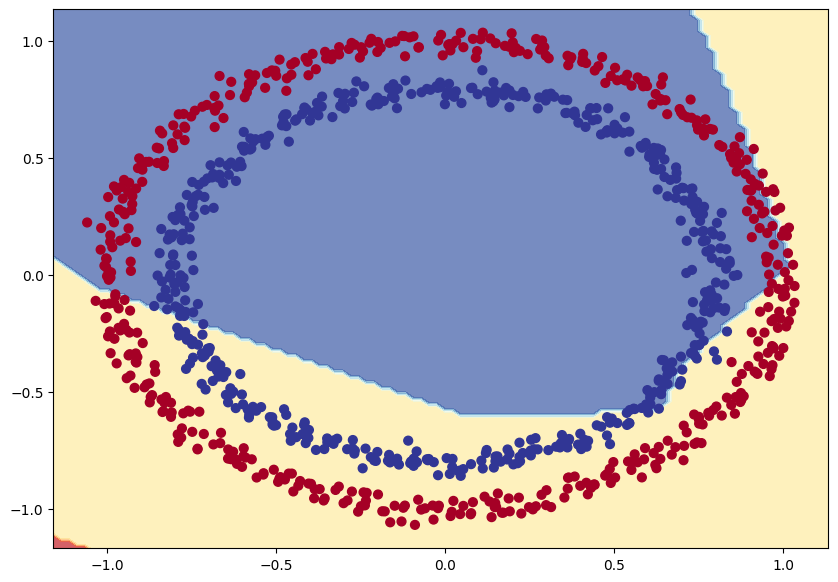

In [74]:
plot_decision_boundry(model=model_7,
                      X=X,
                      y=y)

In [75]:
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile a model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit a model
history = model_8.fit(X, y, callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5), epochs=1000)

Epoch 1/1000
32/32 [==============================] - 0s 740us/step - loss: 0.7275 - accuracy: 0.4960
Epoch 2/1000
32/32 [==============================] - 0s 740us/step - loss: 0.7190 - accuracy: 0.4910
Epoch 3/1000
32/32 [==============================] - 0s 740us/step - loss: 0.7135 - accuracy: 0.4780
Epoch 4/1000
32/32 [==============================] - 0s 740us/step - loss: 0.7098 - accuracy: 0.4810
Epoch 5/1000
32/32 [==============================] - 0s 740us/step - loss: 0.7073 - accuracy: 0.4720
Epoch 6/1000
32/32 [==============================] - 0s 708us/step - loss: 0.7056 - accuracy: 0.4390
Epoch 7/1000
32/32 [==============================] - 0s 740us/step - loss: 0.7041 - accuracy: 0.4260
Epoch 8/1000
32/32 [==============================] - 0s 708us/step - loss: 0.7031 - accuracy: 0.4170
Epoch 9/1000
32/32 [==============================] - 0s 772us/step - loss: 0.7021 - accuracy: 0.4070
Epoch 10/1000
32/32 [==============================] - 0s 740us/step - loss: 0.701

In [76]:
# 4. Evaluate a model
model_8.evaluate(X, y)

32/32 [==============================] - 0s 674us/step - loss: 0.0410 - accuracy: 0.9930


[0.04103492572903633, 0.9929999709129333]

313/313 [==============================] - 0s 569us/step
Doing binary classification


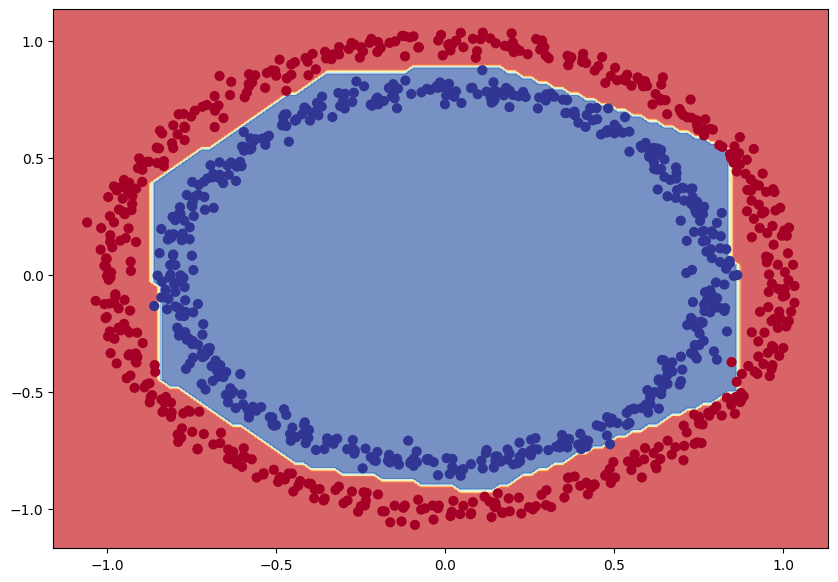

In [77]:
# Let's visualize oir incredible metrics
plot_decision_boundry(model=model_8,
                      X=X,
                      y=y)

🔑 **Note:** The combination of linear and non linear functions is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions, let's see them in action.

In [78]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

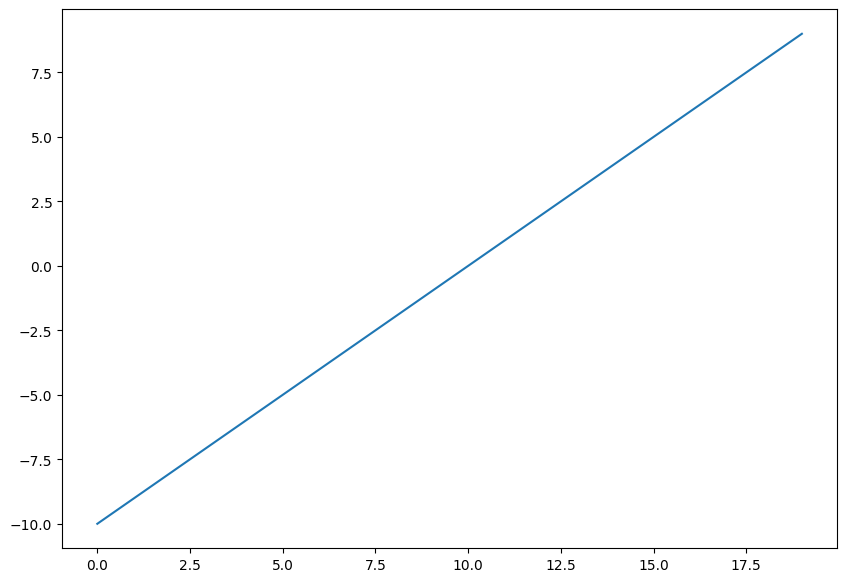

In [79]:
# Visualise our toy tensor
plt.figure(figsize=(10,7))
plt.plot(A)

**Sigmoid activation function**

In [80]:
# Let's start by replicatng sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.math.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

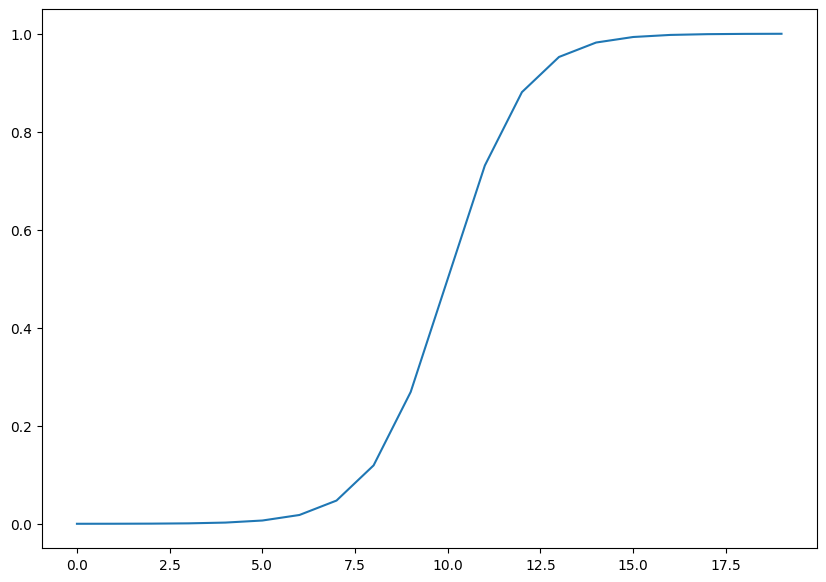

In [81]:
# Plot our toy tensor transformed by sigmoid
plt.figure(figsize=(10,7))
plt.plot(sigmoid(A))

**ReLU activation function**

In [82]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

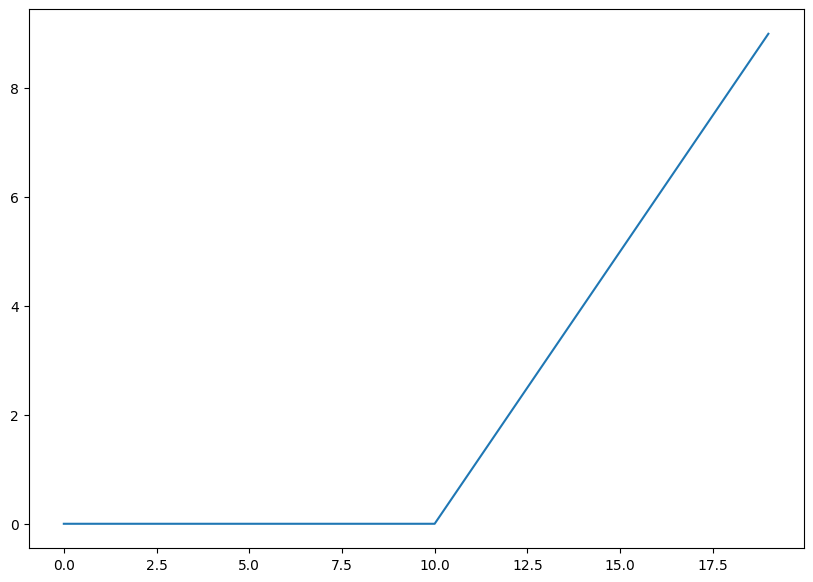

In [83]:
# Plot ReLU-modified tensor
plt.figure(figsize=(10,7))
plt.plot(relu(A))

**Linear activation function**

In [84]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

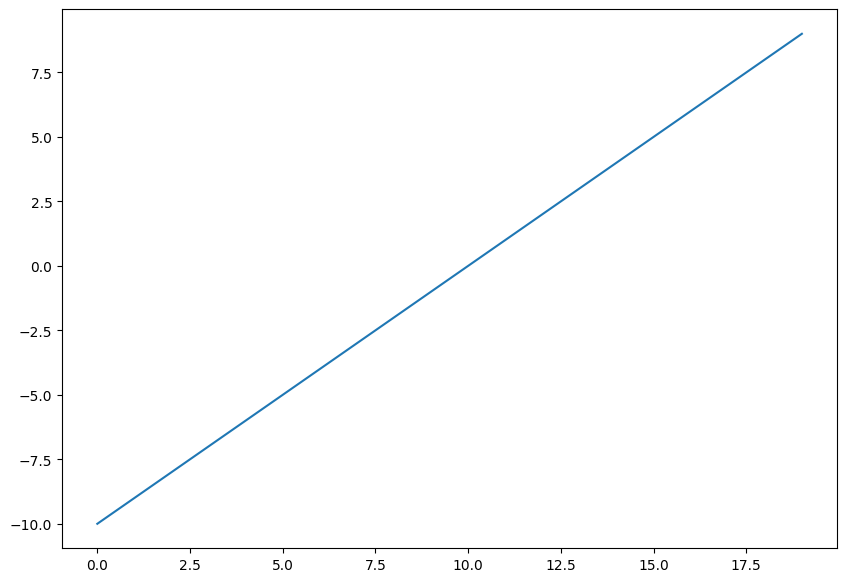

In [85]:
# Does the linear activation function change anything
plt.figure(figsize=(10,7))
plt.plot(tf.keras.activations.linear(A))

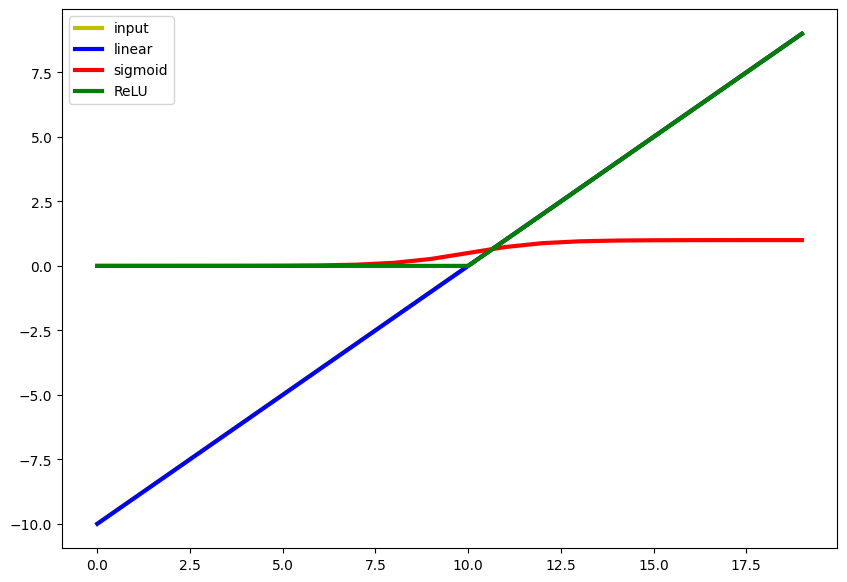

In [86]:
# Activation functions comparison
plt.figure(figsize=(10,7))
plt.plot(A, c='y', linewidth=3, label='input')
plt.plot(tf.keras.activations.linear(A), c='b', linewidth=3, label='linear')
plt.plot(sigmoid(A), c='r', linewidth=3, label='sigmoid')
plt.plot(relu(A), c='g', linewidth=3, label='ReLU')
plt.legend()